
# TP autoencoder

Diane LINGRAND

diane.lingrand@univ-cotedazur.fr 

In [1]:
import tensorflow
print(tensorflow.__version__)
import tensorflow.keras

2.4.1


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist

from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import glob
#!pip install tqdm
from tqdm import tqdm
import random
from matplotlib import pyplot as plt

# Part I: playing with the MNIST dataset

In [4]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# preprocessings
x_train = x_train.astype('float32') / 255. # 2D images
x_test = x_test.astype('float32') / 255.
xTrain = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) # 1D images
xTest = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

size1 = len(xTrain[0])
size = len(x_train[0])
print(size,size1)

28 784


## a first simple autoencoder

In [ ]:
inputImage = Input(shape=(size1,))
encoded = Dense(size, activation='relu')(inputImage)
decoded = Dense(size1, activation='sigmoid')(encoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

In [ ]:
### learning the autoencoder
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
# scores
print("train score = ", autoencoder.evaluate(xTrain,xTrain))
print("test score = ", autoencoder.evaluate(xTest,xTest))

In [ ]:
xTrainPredicted = autoencoder.predict(xTrain)

In [ ]:
# let's look at the images
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

In [ ]:
#more images (could also be done on the test dataset)
index = random.randint(0,len(xTrain)-1)
print("image number: ", index)

fig = plt.figure(figsize=(20, 8))
for i in range(1,11):
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+10)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
    
    index = random.randint(0,len(xTrain)-1)
    im1 = xTrain[index]
    im1 = im1.reshape((size,size))
    im2 = xTrainPredicted[index]
    im2 = im2.reshape((size,size))
    ax = fig.add_subplot(4, 10, i+20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im1, cmap='gray')
    ax = fig.add_subplot(4, 10, i+30)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(im2, cmap='gray')
plt.show()

## a more complex autoencoder

In [ ]:
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

## a convolutional autoencoder

In [ ]:
inputImage = Input(shape=(size,size,1))
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
decoded = UpSampling2D((2,2))(encoded)
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(32, (3, 3), activation='relu',padding='same')(decoded)
decoded = Conv2D(1, (3,3), activation='relu',padding='same')(decoded)
autoencoder = Model(inputImage,decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.summary()

What is the dimension of the bottleneck ? Learn, test, and observe the differences.
Don't forget to put (28x28) images in input.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

## separate encoding and decoding

In [ ]:
# encoder part
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# decoder part
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

# autoencoder model that will be learned
autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
autoencoder.summary()

#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

In [ ]:
#For a single data:
index = random.randint(0,len(xTest)-2)
print("image number: ", index)
im = xTest[index]

# encoding of an image
latentData = encoderModel.predict(np.array([im,]))

print("shape = ",latentData.shape)

decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)


In [ ]:
#display
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
plt.imshow(im.reshape(28,28), cmap='gray')
ax = fig.add_subplot(1,2,2)

plt.imshow(decodedData[0].reshape(28,28), cmap='gray')
plt.show()

# Part II: playing with the animals10 dataset

In [ ]:
# download the dataset
from google.colab import drive
drive.mount('/content/drive/')
datasetRoot='/content/drive/My Drive/DLS2020/raw-img/'

In [ ]:
# or work localy using already downloaded dataset
# modify to your local directory
datasetRoot='/home/lingrand/Ens/MachineLearning/animals/raw-img/'

In [ ]:

classes = ['mucca', 'elefante', 'gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']
#training data

rootTrain = datasetRoot+'train/'
size = 66 #112 #224 #try different image size reductions
size2 = size*size
nbImages = 0
for cl in classes:
    nbImages += len(glob.glob(rootTrain+cl+'/*'))
xTrain = xTrain = np.empty(shape=(nbImages,size2))
print("total number of images: ",len(xTrain))
i = 0
for cl in tqdm(classes):
    listImages = glob.glob(rootTrain+cl+'/*')
    print("class: ", cl, " : ", len(listImages)) 
    for pathImg in tqdm(listImages): 
        img = image.load_img(pathImg, target_size=(size, size),color_mode='grayscale')
        im = image.img_to_array(img)
        im = np.reshape(im,size2)
        im /= 255.0
        xTrain[i, :] = im 
        i += 1
print(xTrain.shape)



In [ ]:
print(size2)

## Let us build an autoencoder

In [ ]:

inputImage = Input(shape=(size2,))
encoded = Dense(4000, activation='relu')(inputImage)
encoded = Dense(2000, activation='relu')(encoded)

decoded = Dense(4000, activation='relu')(encoded)
decoded = Dense(size2, activation='sigmoid')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
print(autoencoder.summary())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)


In [ ]:
#learning
autoencoder.fit(xTrain, xTrain, epochs=100,batch_size=256, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
print("score = ", autoencoder.evaluate(xTrain,xTrain))

In [ ]:
# predictions
xTrainPredicted = autoencoder.predict(xTrain)


In [ ]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im1 = im1.reshape((size,size))
im2 = xTrainPredicted[index]
print(im2.shape)
im2 = im2.reshape((size,size))
print(im2.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(im2, cmap='gray')
plt.show()

Try also to plot more images.

## From dense to convolutional layers
Change the Dense layers to Conv2D layers and add Pooling layers. 

In [ ]:
# prepare the data
xTrain = xTrain.reshape(nbImages,size,size)

In [ ]:
print(xTrain.shape)

In [ ]:
# your work is to try different architectures in order to find the best reconstruction / reduction of latent representation
#  encoder part
size=66
inputImage = tensorflow.keras.Input(shape=(size, size, 1))
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(inputImage)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='valid')(encoded)

#  decoding part
decoded = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(2, (3, 3), activation='relu', padding='same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.summary()

In [ ]:
# compile, run, test, ... as in previous section
autoencoder.fit(xTrain, xTrain, epochs=100,batch_size=256, validation_split=0.2, shuffle=True,callbacks=[ourCallback])

In [ ]:
print("score = ", autoencoder.evaluate(xTrain,xTrain))
xTrainPredictedConv = autoencoder.predict(xTrain)

In [ ]:
# let's look at the differences

index = random.randint(0,len(xTrain)-1)
print("image number: ", index)
im1 = xTrain[index]
im2 = xTrainPredicted[index]
im2 = im2.reshape((size,size))
im3 = xTrainPredictedConv[index]
print(im3.shape)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1, 3, 2)
plt.imshow(im2, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(im3[:,:,0], cmap='gray')
plt.show()

## Perturbation on the latent representation

In this section, we will perturb the latent representation before decoding. Perturbations will be represented as additive noise. We will also explore the latent space by searching for latent vectors in the neighbourhood of some latent representation of training samples and see how the decoding representation looks like.

In [ ]:
# encoder model 
encoderModel = Model(inputImage, encoded)
# decoder model (adapt this code to your network)
inputLatent = Input(shape=(33,33,2)) # to adapt to your network
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)

In [ ]:
# ATTENTION: à adapter à votre réseau
index = random.randint(0,len(xTrain)-2)
print("image number: ", index)
im1 = xTrain[index]
jm1 = xTrain[index+1]
# encoding of an image
latentData1 = encoderModel.predict(np.array([im1,]))
latentData2 = encoderModel.predict(np.array([jm1,]))
# perturbation on the latent representation (you have to try different values/distributions for epsilon)
epsilon = 0.1
# first idea: add noise to the latent representation
#latentData += np.random.uniform(-epsilon, epsilon, size=(1,33,33,16))
print("shape = ",latentData.shape)
# second idea : use the mean from 2 latent representations
# decoding of the latent representation
latentData = 0.5*(latentData1+latentData2)
decodedData = decoderModel.predict(latentData)
print("shape2 = ", decodedData.shape)
#display
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
ax = fig.add_subplot(1,3,2)
plt.imshow(jm1, cmap='gray')
ax = fig.add_subplot(1, 3, 3)
plt.imshow(decodedData[0,:,:,0], cmap='gray')
plt.show()

# Part III: using compact representation for classification algorithm

## Let's learn first an autoencoder

In [ ]:
# encoder part
inputImage = Input(shape=(size1,))
encoded = Dense(500, activation='relu')(inputImage)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# decoder part
decoded = Dense(250, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(size1, activation='sigmoid')(decoded)

# autoencoder model that will be learned
autoencoder = Model(inputImage, decoded)
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
autoencoder.summary()

#encoder model: weigths are already learned
encoderModel = Model(inputImage, encoded)
encoderModel.summary()
# decoder model (adapt this code to your network): weigths are already learned
inputLatent = Input(shape=(28,)) 
decoder = autoencoder.layers[-3](inputLatent)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoderModel = Model(inputLatent,decoder)
decoderModel.summary()

In [ ]:
# We need to compute the latent representation of the whole dataset
latentXtrain = encoderModel.predict(xTrain)
latentXtest = encoderModel.predict(xTest)

## Now ready for the classification

In [ ]:
# any classification algorithm: eg SVM
classif = SCV(C=1.0, kernel="linear")
SCV.fit(latentXtrain, y_train)

# Part IV: Variational Autoencoder (VAE)
## Let's start again with the MNIST dataset
We assume the distribution of latent data to be gaussian: 2 parameters: mu and sigma (or log(sigma))

In [202]:
## ENCODER PART
#Encoder starting at 784, one hidden layer with 256 and latent dimension dimLatent
dimLatent = 28
inputImage = Input(shape=(size1,))
encoded = Dense(256, activation='relu')(inputImage)
# this is the new part
zMu = Dense(dimLatent)(encoded)
zLogSigma = Dense(dimLatent)(encoded)

In [203]:
## SAMPLE GENERATION PART
from tensorflow.keras import backend as bk

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = bk.random_normal(shape=(bk.shape(z_mean)[0], dimLatent), mean=0.0, stddev=0.1)
    # z = mu + sigma * random epsilon
    return z_mean + bk.exp(z_log_sigma) * epsilon

We will use a <a href="https://keras.io/api/layers/core_layers/lambda/">Lambda</a> layer for wrapping the sampling function to a keras layer.

In [204]:
z = Lambda(sampling)([zMu, zLogSigma])

In [205]:
# Create encoder model
encoder = Model(inputImage, [zMu, zLogSigma, z]) #, name='encoder')


In [206]:
## DECODER PART and DECODER MODEL
latent = Input(shape=(dimLatent,))#, name='z_sampling')
decoded = Dense(256, activation='relu')(latent)
decoded = Dense(size1, activation='sigmoid')(decoded)
decoder = Model(latent, decoded) #, name='decoder')


In [207]:
## THE WHOLE VAE that will be trained
# for using only z in the latent space, we ask for the component 2 of [zMu, zLogSigma, z]
outputImage = decoder(encoder(inputImage)[2])
vae = Model(inputImage, outputImage)


In [208]:
from tensorflow.keras.losses import binary_crossentropy
## Loss function is composed of 2 terms:
# 1 - reconstruction loss
reconstruction_loss = binary_crossentropy(inputImage, outputImage)
reconstruction_loss *= size1
print(reconstruction_loss)
# 2 - Kullback-Leibner loss
kl_loss = 1 + zLogSigma - bk.square(zMu) - bk.exp(zLogSigma)
kl_loss = bk.sum(kl_loss, axis=-1)
kl_loss *= -0.5
# vae loss
vae_loss = bk.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.math.multiply_6/Mul:0', description="created by layer 'tf.math.multiply_6'")


In [209]:
## training
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

vae.fit(xTrain, xTrain, epochs=100, batch_size=128, validation_split=0.2, shuffle=True,callbacks=[ourCallback])
vae.summary()

Epoch 1/100
375/375 [==============================] - 3s 7ms/step - loss: 220.9631 - val_loss: 106.8200
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 101.6373 - val_loss: 92.5450
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 89.9487 - val_loss: 86.3562
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 84.7445 - val_loss: 83.0384
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 81.9432 - val_loss: 81.2033
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 80.0453 - val_loss: 79.6513
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 78.6054 - val_loss: 78.6940
Epoch 8/100
375/375 [==============================] - 2s 6ms/step - loss: 77.6107 - val_loss: 77.9150
Epoch 9/100
375/375 [==============================] - 2s 6ms/step - loss: 76.7316 - val_loss: 76.9673
Epoch 10/100
375/375 [==============================] - 2s 6ms/step - 

Epoch 80/100
375/375 [==============================] - 2s 6ms/step - loss: 67.8017 - val_loss: 69.5325
Epoch 81/100
375/375 [==============================] - 2s 6ms/step - loss: 67.8520 - val_loss: 69.6690
Epoch 82/100
375/375 [==============================] - 3s 7ms/step - loss: 67.7106 - val_loss: 69.3764
Epoch 83/100
375/375 [==============================] - 2s 7ms/step - loss: 67.7745 - val_loss: 69.3654
Epoch 84/100
375/375 [==============================] - 3s 7ms/step - loss: 67.6852 - val_loss: 69.5252
Epoch 85/100
375/375 [==============================] - 2s 6ms/step - loss: 68.0276 - val_loss: 69.4345
Epoch 86/100
375/375 [==============================] - 2s 7ms/step - loss: 67.6209 - val_loss: 69.4093
Epoch 87/100
375/375 [==============================] - 2s 6ms/step - loss: 67.6692 - val_loss: 69.4991
Epoch 88/100
375/375 [==============================] - 3s 7ms/step - loss: 67.7513 - val_loss: 69.4306
Epoch 89/100
375/375 [==============================] - 2s 6ms/s

**Question 1:** Observe the encoding/decoding of some of the digits from the test dataset.
    
    1. prepare the xTest
    2. predict the xTest transformation done by the VAE model
    3. display/plot some of the xTest images with their transformations

In [210]:
#For a single data:
index = random.randint(0,len(xTest)-2)
print("image number: ", index)
im = xTest[index]

image number:  7064


In [211]:
pred = vae.predict(im.reshape(1, 28*28))

<function matplotlib.pyplot.show(close=None, block=None)>

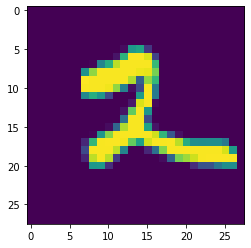

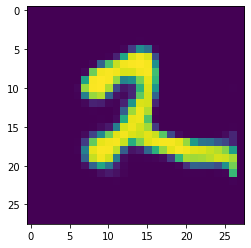

In [212]:
plt.figure(1)
plt.imshow(im.reshape(28,28))
plt.figure(2)
plt.imshow(pred.reshape(28,28))
plt.show

In [213]:
xTest_pred = vae.predict(xTest)

**Question 2:** Now, you can generate new samples. Start with the latent representation of a digit, as for example an '8', compute it's latent representation and move around (in the neighborhood of this latent point): observe the neighborhood points decoded: do they look like an '8'?

image number:  5678


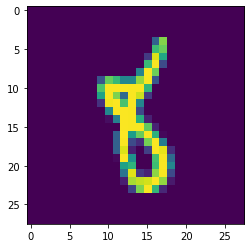

In [221]:
#For a single data:
index = random.randint(0,len(xTest)-2)
print("image number: ", index)
im8 = xTest[index]
plt.imshow(im8.reshape(28,28))

In [222]:
# encoding of an image
latentData = encoder.predict(im8.reshape(-1, 784))

In [223]:
import random as rd

In [224]:
decodedData1 = decoder.predict(latentData[0].reshape(-1,28))
decodedData2 = decoder.predict(latentData[1].reshape(-1,28))
decodedData3 = decoder.predict(latentData[2].reshape(-1,28))

In [225]:
lDMod1 = latentData[0]
lDMod1[0, rd.randint(0,27)] = random.choice(latentData[0][0])
lDMod2 = latentData[1]
lDMod2[0, rd.randint(0,27)] = random.choice(latentData[1][0])
lDMod3 = latentData[2]
lDMod3[0, rd.randint(0,27)] = random.choice(latentData[2][0])

decodedDataMod1 = decoder.predict(lDMod1.reshape(-1,28))
decodedDataMod2 = decoder.predict(lDMod2.reshape(-1,28))
decodedDataMod3 = decoder.predict(lDMod3.reshape(-1,28))

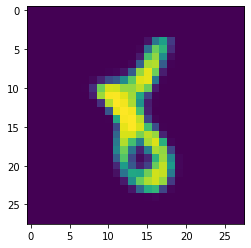

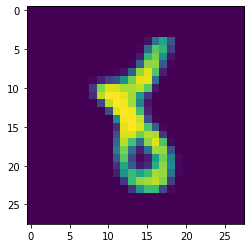

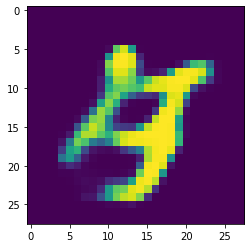

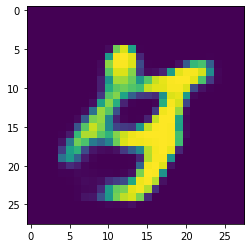

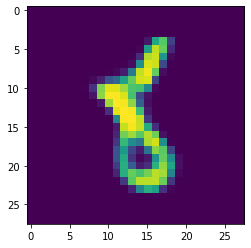

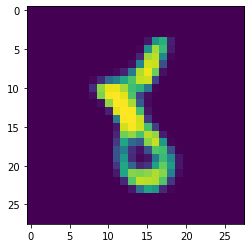

In [226]:
plt.figure(1)
plt.imshow(decodedData1.reshape(28,28))
plt.figure(2)
plt.imshow(decodedDataMod1.reshape(28,28))
plt.figure(3)
plt.imshow(decodedData2.reshape(28,28))
plt.figure(4)
plt.imshow(decodedDataMod2.reshape(28,28))
plt.figure(5)
plt.imshow(decodedData3.reshape(28,28))
plt.figure(6)
plt.imshow(decodedDataMod3.reshape(28,28))
plt.show()

In [229]:
epsilon = 0.1

lDMod1 = latentData[0]
lDMod1 += np.random.uniform(-epsilon, epsilon)
lDMod2 = latentData[1]
lDMod2 += np.random.uniform(-epsilon, epsilon)
lDMod3 = latentData[2]
lDMod3 += np.random.uniform(-epsilon, epsilon)

decodedDataMod1 = decoder.predict(lDMod1.reshape(-1,28))
decodedDataMod2 = decoder.predict(lDMod2.reshape(-1,28))
decodedDataMod3 = decoder.predict(lDMod3.reshape(-1,28))

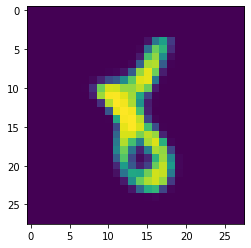

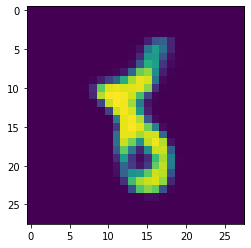

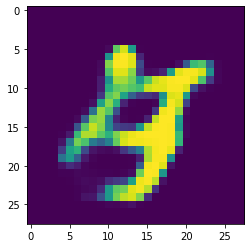

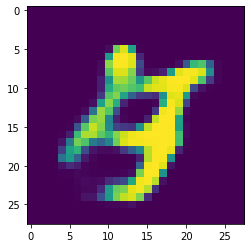

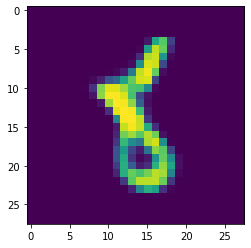

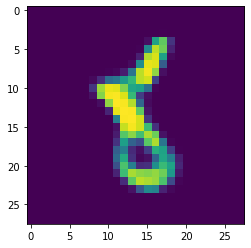

In [230]:
plt.figure(1)
plt.imshow(decodedData1.reshape(28,28))
plt.figure(2)
plt.imshow(decodedDataMod1.reshape(28,28))
plt.figure(3)
plt.imshow(decodedData2.reshape(28,28))
plt.figure(4)
plt.imshow(decodedDataMod2.reshape(28,28))
plt.figure(5)
plt.imshow(decodedData3.reshape(28,28))
plt.figure(6)
plt.imshow(decodedDataMod3.reshape(28,28))
plt.show()

(1, 784)


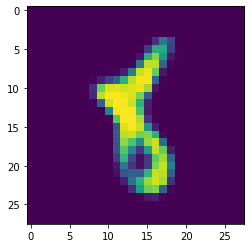

In [231]:
pred = vae.predict(im8.reshape(-1, 784))
print(pred.shape)
plt.imshow(pred.reshape(28,28))

## Now play with a real image dataset
The <a href="http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html">CelebA</a> available directly in tensorflow: https://www.tensorflow.org/datasets/catalog/celeb_a )


In [200]:
from tensorflow_datasets.image import CelebA

In [201]:
help(CelebA)

Help on class CelebA in module tensorflow_datasets.image.celeba:

class CelebA(tensorflow_datasets.core.dataset_builder.GeneratorBasedBuilder)
 |  CelebA(*, file_format: Union[NoneType, str, tensorflow_datasets.core.file_adapters.FileFormat] = <FileFormat.TFRECORD: 'tfrecord'>, **kwargs: Any)
 |  
 |  CelebA dataset. Aligned and cropped. With metadata.
 |  
 |  Method resolution order:
 |      CelebA
 |      tensorflow_datasets.core.dataset_builder.GeneratorBasedBuilder
 |      tensorflow_datasets.core.dataset_builder.FileReaderBuilder
 |      tensorflow_datasets.core.dataset_builder.DatasetBuilder
 |      tensorflow_datasets.core.registered.RegisteredDataset
 |      abc.ABC
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  RELEASE_NOTES = {'2.0.1': 'New split API (https://tensorflow.org/datas...
 |  
 |  SUPPORTED_VERSIONS = [Version('2.0.0')]
 |  
 |  VERSION = Version('2.0.1')
 |  
 |  __abstractmethods__ = frozenset()
 |  
 |  name = 'celeb_a'
 |  
 